In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import mplfinance as mpf
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'    ] = 100

In [2]:
df = pd.read_csv("./data/BTCUSD_PERP-1m-2021-12.csv", 
        names=[
            "datetime", "open", "high", "low", "close", "volume",
            "close_dt", "quote_asset_volume", "number_of_trades", 
            "taker_buy_base_volume", "taker_buy_quote_volume", "col12"
        ],
        header=None
        ).astype({'datetime':'datetime64[ms]'})

df.set_index('datetime', inplace=True)

df

,open,high,low,close,volume,close_dt,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,col12
datetime,,,,,,,,,,,
2021-12-01 00:00:00,56995.7,57078.4,56898.1,56899.4,245564,1638316859999,431.053665,2938,96995,170.286070,0
2021-12-01 00:01:00,56899.4,56918.9,56738.7,56782.1,177135,1638316919999,311.651138,1878,67519,118.773453,0
2021-12-01 00:02:00,56782.1,56796.5,56702.6,56710.0,246997,1638316979999,435.188447,2671,123151,216.994648,0
2021-12-01 00:03:00,56710.8,56857.2,56695.1,56812.8,190718,1638317039999,335.919841,2368,117345,206.667562,0
2021-12-01 00:04:00,56812.7,56924.6,56802.8,56879.1,79294,1638317099999,139.399370,1232,41095,72.253166,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 23:55:00,46271.5,46271.5,46251.0,46251.0,4403,1640994959999,9.517469,154,1637,3.538715,0
2021-12-31 23:56:00,46251.0,46263.7,46246.4,46251.5,20011,1640995019999,43.263942,308,12432,26.880166,0
2021-12-31 23:57:00,46251.5,46263.8,46249.6,46250.0,11612,1640995079999,25.105110,186,9235,19.966498,0


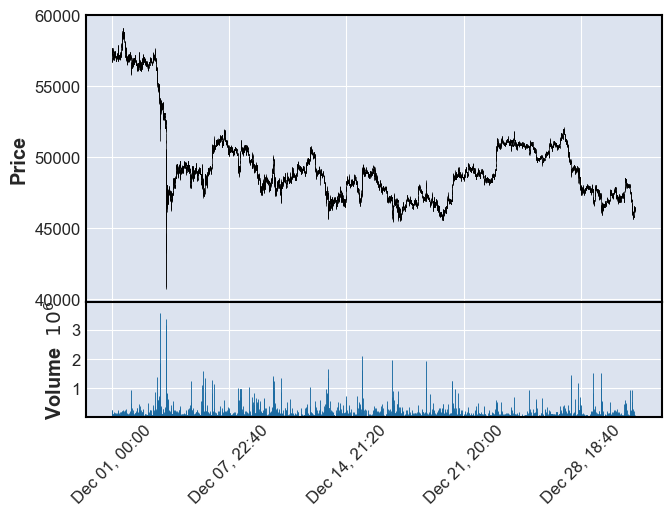

In [6]:
mpf.plot(df, volume=True)

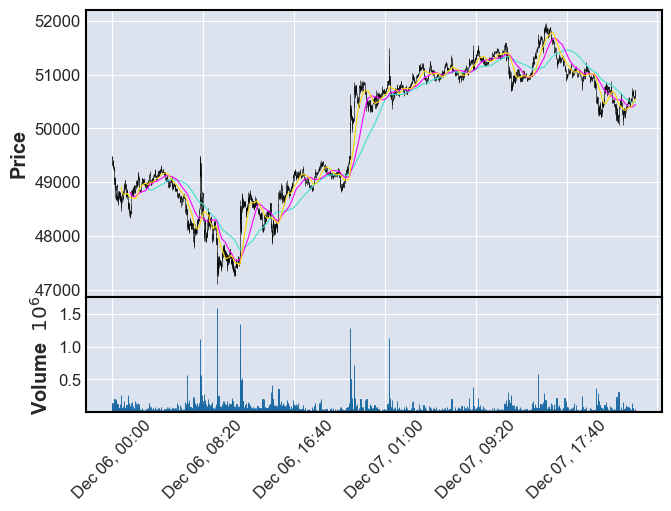

In [7]:
mpf.plot(df['2021-12-06': '2021-12-07'], type='candle', mav=(200, 100, 50), volume=True)

In [10]:
# daily vol, reindexed to close 

def get_daily_volatility(close, span0=100):
    df0 = close.index.searchsorted(close.index-pd.Timedelta(days=1))
    df0 = df0[df0>0]
    df0 = pd.Series(close.index[df0-1], index = close.index[close.shape[0]-df0.shape[0]:])
    df0 = close.loc[df0.index]/close.loc[df0.values].values-1
    df0 = df0.ewm(span=span0).std() 
    return df0

In [23]:
df['daily_volatility'] = volatility_df

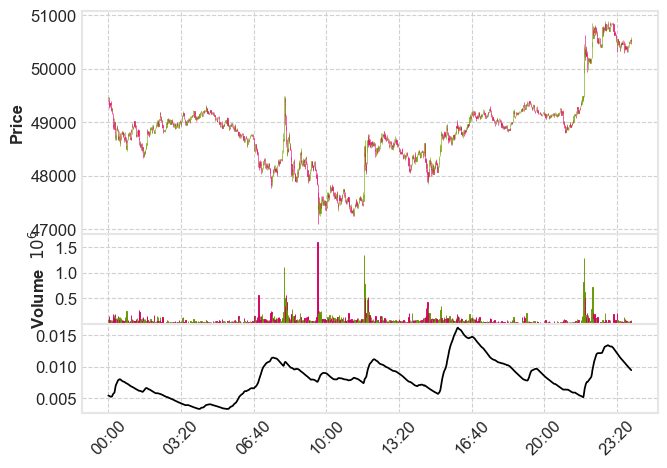

In [26]:
ap2 = [
    mpf.make_addplot(df["2021-12-06":"2021-12-06"]['daily_volatility'], color='black', panel=2)
    ]
mpf.plot(df["2021-12-06":"2021-12-06"], type='candle', volume=True, style='binance', addplot=ap2)